# Exploratory Data Analysis on Super Store

## Introduction

Super Store is a small retail business located in the United States. They sell Furniture, Office Supplies and Technology products and their customers are the mass Consumer, Corporate and Home Offices. The data set contains sales, profit and geographical information of individual orders.
Our task is to determine weak areas and opportunities for Super Store to boost business growth.

This notebook will answers these questions:
- Which Category is Best Selling and Most Profitable?
- What are the Best Selling and Most Profitable Sub-Category?
- Which is the Top Selling Sub-Category?
- Which Customer Segment is Most Profitable?
- Which is the Preferred Ship Mode?
- Which Region is the Most Profitable?
- Which City has the Highest Number of Sales?

This notebook was meant to be read by:
- Owners of the store who are very invested in their business
- Owners are likely not people who are expert in reading charts or interpreting statistical 
  analysis, so our analysis will be in layman terms and easy to understand. They needs 
  information to make informed decisions on how to boost business profit so, our analysis focus   on finding weaknesses or opportunities and providing recommendations and marketing
  strategies. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
super_store = pd.read_csv('SampleSuperstore.csv')

## Exploration

In [3]:
super_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
super_store.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [5]:
super_store.shape

(9994, 13)

In [6]:
super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Cleaning

### Removing missing and duplicated values

In [7]:
super_store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
super_store.duplicated().sum()

17

In [9]:
super_store[super_store.duplicated(keep = 'last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


In [10]:
# Remove duplicates
super_store.drop_duplicates(inplace = True)
super_store.shape

(9977, 13)

### Added Profit Margin

In [11]:
super_store['Profit Margin %'] = (super_store.Profit / super_store.Sales) * 100
super_store.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


## Descriptive Statistical Analysis

In [12]:
super_store.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,12.011354
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,46.663769
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,7.500000
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,27.000000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,36.250000


From this we can deduce that :
- There are 4 ship modes and 3 customer segments. Nearly half of the orders are from Consumer segment using Standard Class shipment.
- The store carries 3 category of items with 17 sub-category. 60% of orders are for Office Supplies and at least 15% purchases are for Binders.
- 75% of orders makes at least 36% profit margin.
- Loss-making orders can go up to 275% losses. We must place emphasis on these loss-making sales to cut them off.

## Exploratory Data Analysis

### Which Category is Best Selling and Most Profitable ?

In [13]:
category = super_store.groupby(['Category'])['Profit', 'Sales', 'Quantity'].sum()
category

,Profit,Sales,Quantity
Category,,,
Furniture,18421.8137,741306.3133,8020
Office Supplies,122364.6608,718735.2440,22861
Technology,145454.9481,836154.0330,6939


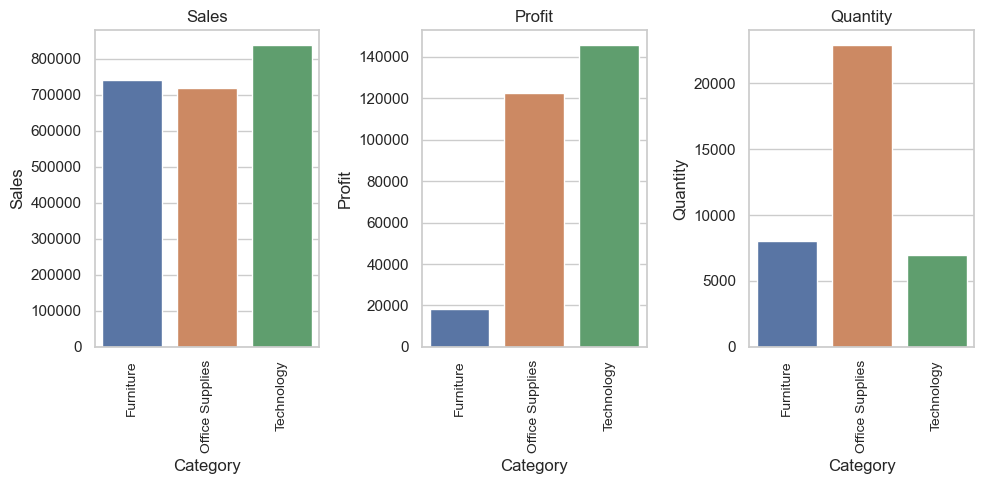

In [14]:
# Set for grouped plots - figure with a 2x2 grid of Axes
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(10, 5))

# Plot barplots
cat1 = sns.barplot(x = category.index, y = category.Sales, ax=axis[0])
cat2 = sns.barplot(x = category.index, y = category.Profit, ax=axis[1])
cat3 = sns.barplot(x = category.index, y = category.Quantity, ax=axis[2])

# Set titles
cat1.set(title = 'Sales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')

# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'vertical', size = 10)
plt.setp(cat2.get_xticklabels(), rotation = 'vertical', size = 10)
plt.setp(cat3.get_xticklabels(), rotation = 'vertical', size = 10)

# Set spacing between subplots
figure.tight_layout()

#### Observations
- Sales for all categories are similar to each other
- Technology have the highest sales and profit. The amount of technology devices sold are at a minimum since these device are a oneoff purchase where it occurs approximately once 
every 4 to 5 years
- Office Supplies has the most amounts of quantities sold since it is relatively cheap
- Furniture has similar sales when compare to technology but unfortunately this does not reflect to their profitability and number of quantities sold because they both are at a minimum

###  What are the Best Selling and Most Profitable Sub-Category ?

In [15]:
sub_category = super_store.groupby(['Sub-Category'])['Sales', 'Profit'].sum()

In [16]:
sub_category_sales = pd.DataFrame(sub_category.sort_values('Sales', ascending = False))
sub_category_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [17]:
sub_category_profit = pd.DataFrame(sub_category.sort_values('Profit', ascending = False))
sub_category_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


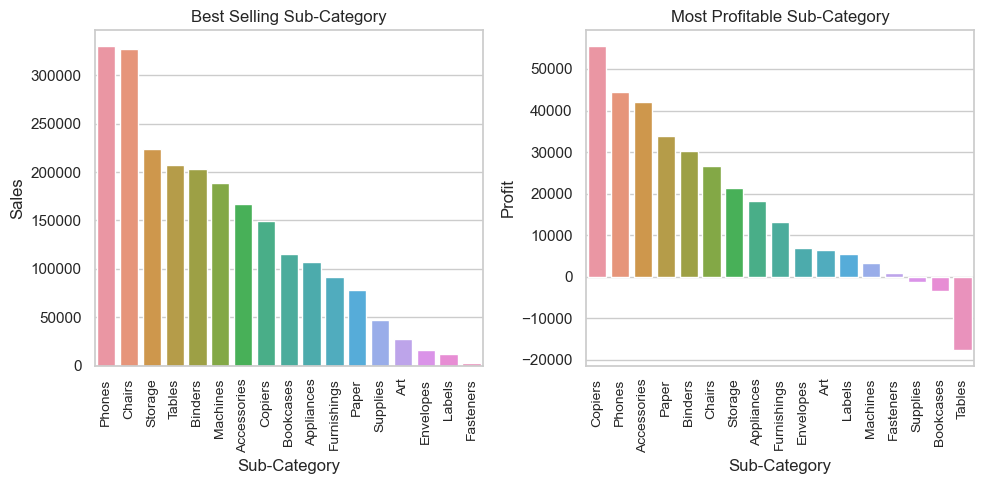

In [18]:
# Plot Bar Plots
sns.set_theme(style="whitegrid")

# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(10, 5))

# Plot Bar Plot for Best Selling Sub-Category
subcat1 = sns.barplot(data = sub_category_sales, x = sub_category_sales.index, y = sub_category_sales.Sales, ax=axis[0])
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)

# Plot Bar Plot for Most Profitable Sub-Category
subcat2 = sns.barplot(data = sub_category_profit, x = sub_category_profit.index, y = sub_category_profit.Profit, ax=axis[1])
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

#### Observations
- Based on sales, Phones and Chairs has the highest sales among all sub-category
- Based on profit, Copiers has the most profit followed by Phones, Accessories, Papers and Binders. This means that the marketing team can focus more on advertising these products.
- Products that need to be dropped from the products catalogue or bargain for a lower price from suppliers are Machines, Fasteners, Supplies, Bookcases and Tables because they have zero profit margin and losses for some products.

### Which is the top selling category ?

In [19]:
subcat_quantity = pd.DataFrame(super_store.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


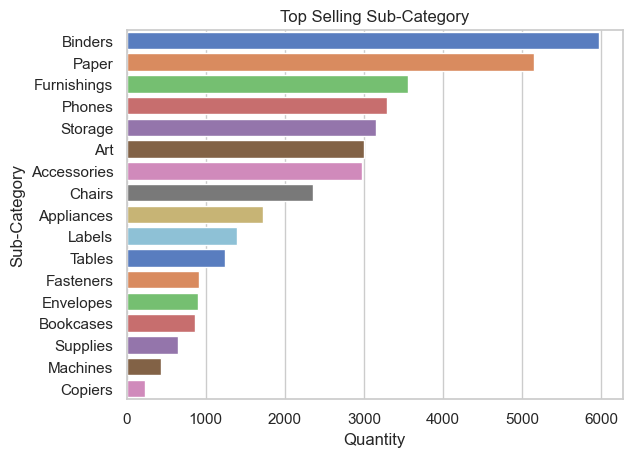

In [20]:
# Plot Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = subcat_quantity, y = subcat_quantity.index, x = subcat_quantity.Quantity, palette = "muted")
plt.title("Top Selling Sub-Category")
plt.show()

#### Observations
- Owners must be able to ensure that inventory are well-stocked for sub-category that have a high number of quantity sold such as Binder, Paper and Furnishings
- Copiers has the least amount of quantity sold even though it gives the highest profit. This is caused by the price of copiers that are more expensive compared to other sub-category.

### Which Customer Segment is Most Profitable ?

In [22]:
seg_analysis = pd.DataFrame(super_store.groupby(['Segment'])['Profit'].sum())
seg_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


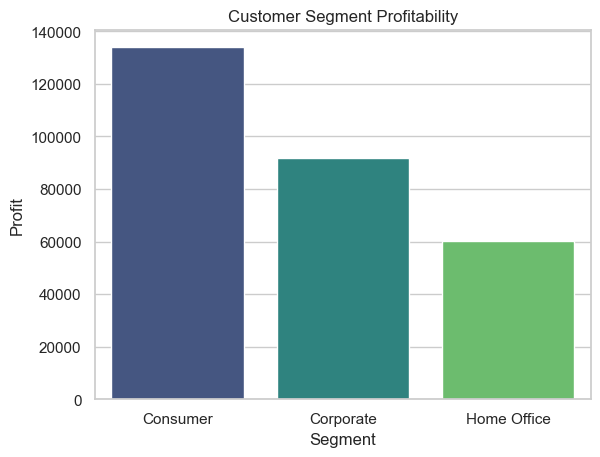

In [25]:
# Plot Bar Plot
sns.set_theme(style="whitegrid")
sns.barplot(data = seg_analysis, x = seg_analysis.index, y = seg_analysis.Profit, palette = "viridis")
plt.title("Customer Segment Profitability")
plt.show()

#### Observations
- Consumer segment has the highest value in terms of profitability followed by Corporate Segment and Home Office. This means that the marketing must focus more on advertising products to these two segment and increase retention rate for these customers.

### Which is the Preferred Ship Mode ?

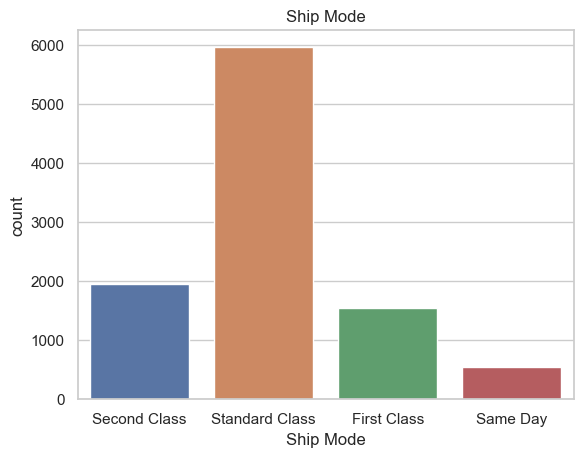

In [27]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(super_store['Ship Mode'])
plt.title("Ship Mode")
plt.show()

#### Observations
- Standard Class is the most preffered one by customers compared to the other ship modes. This might be cause by the relatively cheap price of using a standard class mode of shipment.

### Which Region is the Most Profitable ?

In [32]:
reg_analysis = pd.DataFrame(super_store.groupby(['Region'])['Profit'].sum().reset_index())
reg_analysis

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


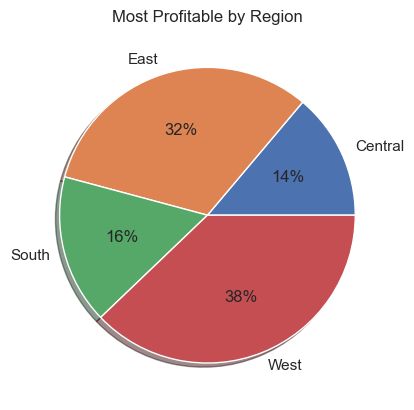

In [37]:
# Plot Pie Chart
explode = [0, 0, 0, 0.1]

plt.pie(reg_analysis.Profit, labels = reg_analysis.Region, autopct = "%1.0f%%", shadow = True)
plt.title("Most Profitable by Region")

plt.show()

#### Observations
- East and West region are most profitable region compared to other regions

### Which City has the Highest Number of Sales ?

In [41]:
city_sales = pd.DataFrame(super_store.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))
top10_sales = city_sales[:10]
top10_sales

,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [43]:
bottom10_sales = city_sales[-10:]
bottom10_sales

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


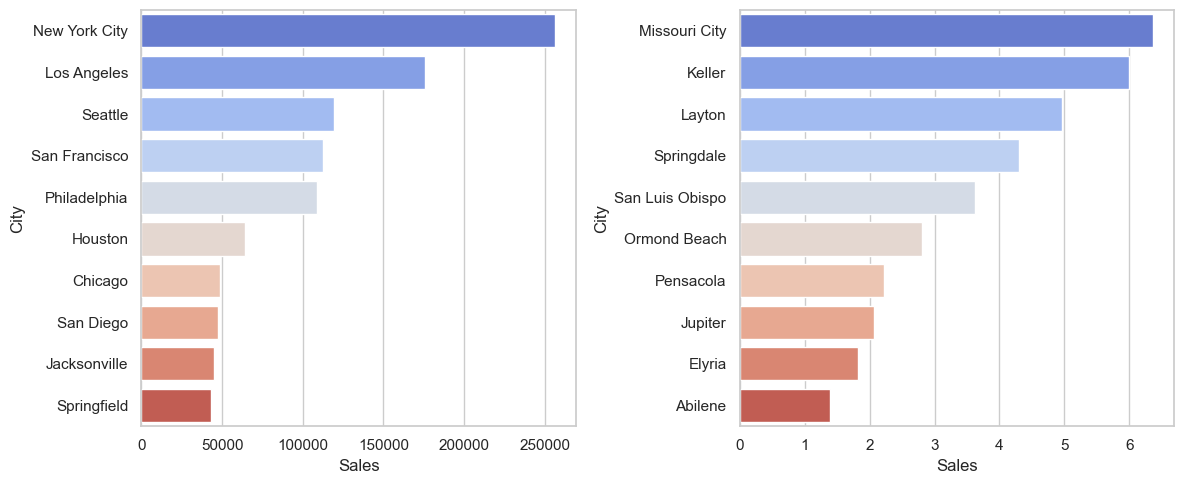

In [48]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme(style="whitegrid")

top10_city = sns.barplot(data = top10_sales, y = top10_sales.index, x = top10_sales.Sales, palette = "coolwarm", ax = axis[0])


# Plot Bar Plot for Best Selling Sub-Category
bottom10_city = sns.barplot(data = bottom10_sales, y = bottom10_sales.index, x = bottom10_sales.Sales, palette = "coolwarm", ax=axis[1])

# Set spacing between subplots
figure.tight_layout()

plt.show()

#### Graph on the left shows the top 10 cities and the right one shows bottom 10 cities.
#### Observations
- We can see that there is a noticeable difference in sales between from these two graphs. The marketing team has to focus more on advertising their products within the top 10 cities with the most sales in order to increase profit. 

## Recommendation 
- Drop loss-making products such as Bookcases and Tables or change suppliers to increase profit margin. 
- Super store needs to sell this loss-making products in a bundle with a more profitable sub-category such as copiers and chairs. This could increase the overall profitability of each product.
- For Home Offices Customers, create a home office package with products used for offices such as table, chairs, copiers, bookcases,etc. This would increase the effectiveness of sales because these customers may not have much time to selct products individually
- Target Consumer and Corporate segment since it makes up more than 70% of our customer base. Focus more on customer in these segment and in the top 10 cities with higher sales. This can be achieved by introducing special promotions or bundles for mass Consumer and Home Offices, send promotional emails or flyers weekly.
